In [18]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import matplotlib as mpl

mpl_config = pd.read_csv('../../mpl_config.csv').to_dict(orient='records')[0]

mpl.rcParams.update(mpl_config)

In [74]:
def standardize(M) :   
    """ Standardization by column for 2D matrices """
    
    M_copy = np.copy(M)
    M_copy = M_copy.astype(float)
    for j in range(np.shape(M)[1]) :
        if np.std(M[:,j]) != 0 :
            M_copy[:,j] = (M[:,j].astype(float) - float(np.mean(M[:,j])))/float(np.std(M[:,j]))
        else : 
            M_copy[:,j] = M[:,j].astype(float) - float(np.mean(M[:,j]))
            
    return M_copy


def full_mean(d, target = 'Spike rate') :
    """Compute mean firing rates for each experimental condition (10)"""
    labels = [k for k in range(1,9)]
    
    mean_rates = []
    
    for label in labels :
        d_label = d[d['Label'] == label]
        mean_rates.append(np.mean(np.stack(d_label[target]),axis=0))
    
    return mean_rates

def sample_spherical(ndim=10):
    """Draw a random multivariate gaussian of dimension ndim"""
    vec = np.random.randn(ndim)
    vec = unit_vector(vec)
    return vec

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [70]:
files = ['M01','M02','M03','M04','M05','M07_Region1','M07_Region2','M08_Region1','M08_Region2',\
       'M09_Region1','M09_Region2','M10_Region1','M11_Region1','M11_Region2']

with open('../DATA/Dataframes/df_full.pickle', 'rb') as f:
    data_full = pickle.load(f)

### PCA model trained on mean over post stimulus time window for each condition (assessing inter-condition variance)

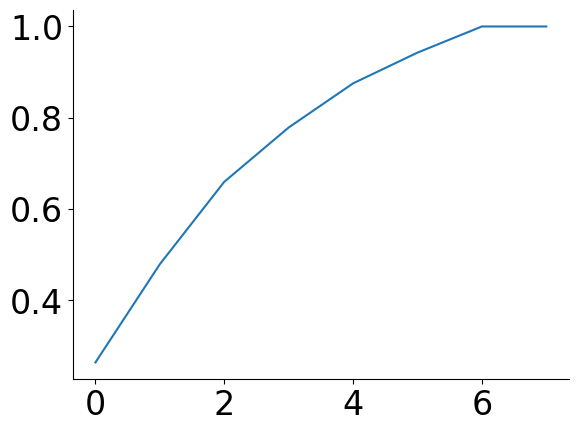

In [81]:
mean_rates = [full_mean(data_full[file],target='Spike rate') for file in files]


M_mean = np.concatenate(mean_rates, axis = 1)
M_mean = standardize(M_mean)

pca = PCA(n_components = 8)
M_mean_pca = pca.fit_transform(M_mean)

plt.plot(pca.explained_variance_ratio_.cumsum())

In [83]:
with open('Models/pca_notime.pickle', 'wb') as f:
    pickle.dump(pca, f)